#  Presented by: RASHI KAPOOR (18CSU168)


# STEP #0: LIBRARIES IMPORT

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [17]:
training_set1 =pd.read_excel (r'Sample - CoffeeChain.xlsx')
training_set1

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget Margin,Budget Sales,Budget COGS,Date,Market,State,Area Code,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,130,220,90,2012-01-01,Central,Colorado,719,Major Market,Coffee,Amaretto,Regular
1,68,107,190,83,39,27,623,80,110,190,80,2012-01-01,Central,Colorado,970,Major Market,Coffee,Colombian,Regular
2,101,139,234,95,38,26,821,110,140,240,100,2012-01-01,Central,Colorado,970,Major Market,Coffee,Decaf Irish Cream,Decaf
3,30,56,100,44,26,14,623,30,50,80,30,2012-01-01,Central,Colorado,303,Major Market,Tea,Green Tea,Regular
4,54,80,134,54,26,15,456,70,90,150,60,2012-01-01,Central,Colorado,303,Major Market,Espresso,Caffe Mocha,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,19,32,60,24,19,7,567,20,30,50,20,2013-12-01,West,Washington,206,Small Market,Espresso,Caffe Latte,Regular
4244,34,80,155,65,57,24,403,30,80,140,60,2013-12-01,West,Washington,509,Small Market,Espresso,Caffe Mocha,Regular
4245,76,96,188,80,45,24,1079,60,100,170,70,2013-12-01,West,Washington,360,Small Market,Espresso,Decaf Espresso,Decaf
4246,86,104,188,72,46,23,461,80,120,200,80,2013-12-01,West,Washington,360,Small Market,Coffee,Colombian,Regular


# STEP #2: EXPLORE/VISUALIZE DATASET

In [18]:
Major = training_set1[training_set1['Market Size']=='Major Market']
Small = training_set1[training_set1['Market Size']== 'Small Market']

In [19]:
print("Total =", len(training_set1))

print("No. of Products sold in a Major Market =", len(Major))
print("Percentage of products sold in a Major Market =", 1.*len(Major)/len(training_set1)*100.0, "%")
 
print("Number of Products sold in a Small Market =", len(Small))
print("Percentage of products sold in a Small Market =", 1.*len(Small)/len(training_set1)*100.0, "%")

Total = 4248
No. of Products sold in a Major Market = 1704
Percentage of products sold in a Major Market = 40.11299435028249 %
Number of Products sold in a Small Market = 2544
Percentage of products sold in a Small Market = 59.887005649717516 %


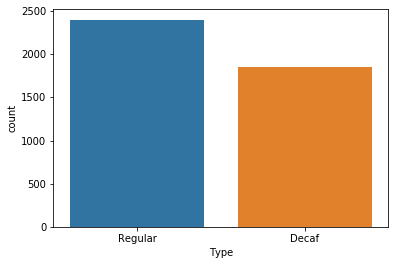

In [20]:
sns.countplot(x='Type', data= training_set1)

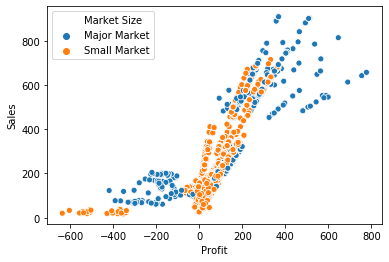

In [21]:
sns.scatterplot(training_set1['Profit'], training_set1['Sales'], hue = training_set1['Market Size'])

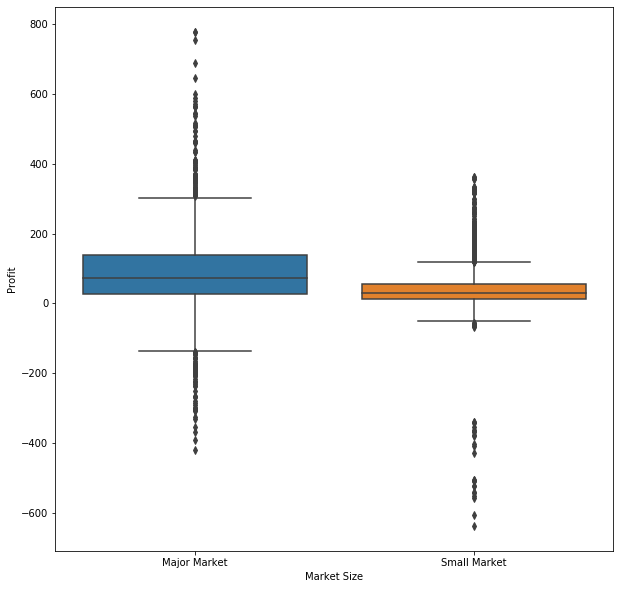

In [22]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Market Size', y='Profit',data=training_set1)

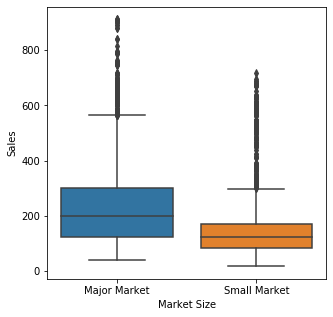

In [23]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Market Size', y='Sales',data=training_set1)

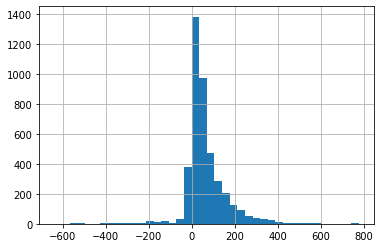

In [24]:
training_set1['Profit'].hist(bins = 40)

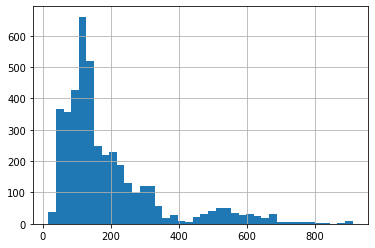

In [25]:
training_set1['Sales'].hist(bins = 40)

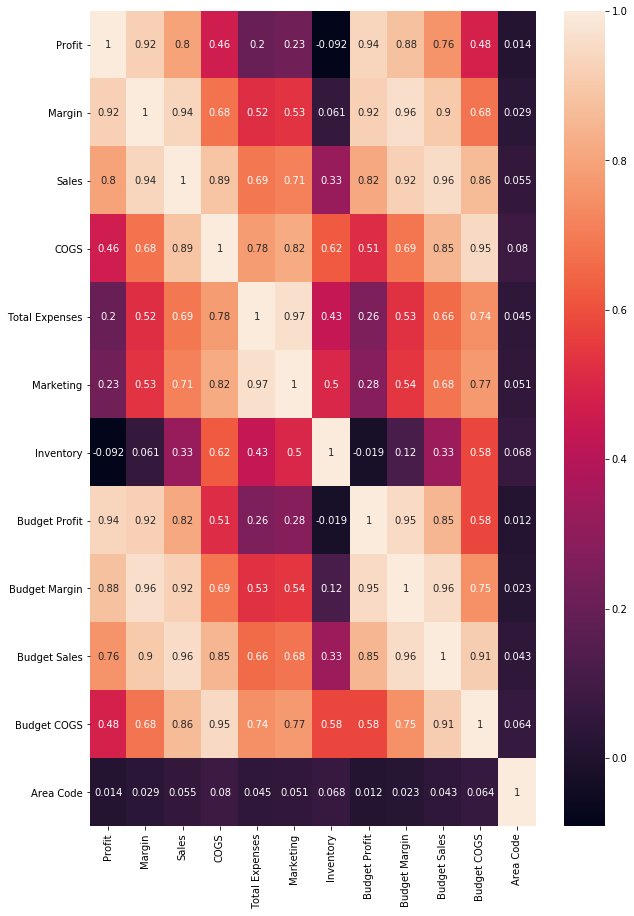

In [26]:
plt.figure(figsize=(10,15))
sns.heatmap(training_set1.corr(),annot=True)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [27]:
training_set= training_set1.replace(to_replace =["Small Market","Major Market"],value =["0","1"])

In [28]:
training_set.drop(['Margin', 'COGS', 'Total Expenses','Marketing','Inventory','Budget Profit','Budget Margin','Budget Sales','Budget COGS','Date','Market','State','Area Code','Type','Product Type','Product'],axis=1,inplace=True)

In [29]:
training_set

,Profit,Sales,Market Size
0,94,219,1
1,68,190,1
2,101,234,1
3,30,100,1
4,54,134,1
...,...,...,...
4243,19,60,0
4244,34,155,0
4245,76,188,0
4246,86,188,0


In [30]:
X = training_set.drop('Market Size',axis=1).values
y = training_set['Market Size'].values

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# STEP#4: MODEL TRAINING

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
X_train

array([[-0.59095101, -0.65504617],
       [ 0.33336725,  0.19860642],
       [-0.69911591, -0.48960962],
       ...,
       [-0.59095101, -0.32417307],
       [ 0.05803841, -0.12564922],
       [ 0.77586003,  1.01255425]])

In [35]:
y_train

array(['0', '1', '0', ..., '0', '0', '1'], dtype=object)

In [36]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# STEP#5: MODEL TESTING

In [37]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [38]:
y_train

array(['0', '1', '0', ..., '0', '0', '1'], dtype=object)

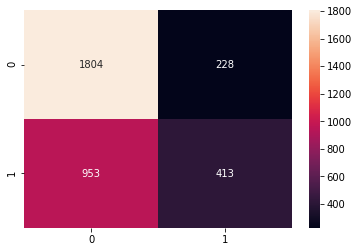

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

TN= 1804 , FN = 953 , FP = 228 , TP = 413

In [40]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array(['1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0

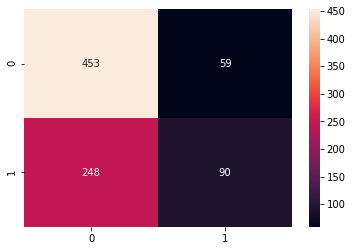

In [41]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

TN = 453, FN = 248 , FP = 59 , TP = 90

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       512
           1       0.60      0.27      0.37       338

    accuracy                           0.64       850
   macro avg       0.63      0.58      0.56       850
weighted avg       0.63      0.64      0.60       850



In [43]:
from sklearn import metrics

In [44]:
print("Accuracy:" , metrics.accuracy_score(y_test, y_predict_test))

Accuracy: 0.6388235294117647


# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS

In [45]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


In [46]:
y_train.shape

(3398,)

In [47]:
X_train.shape

(3398, 2)

(-2.1579732845494477, 5.752026715450384)

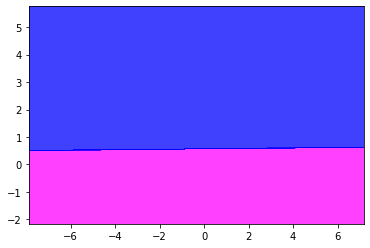

In [48]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
#If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


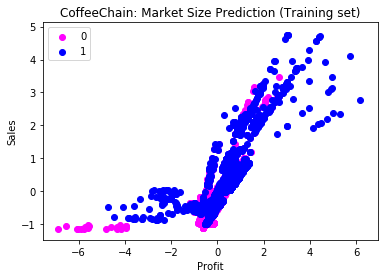

In [49]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('CoffeeChain: Market Size Prediction (Training set)')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


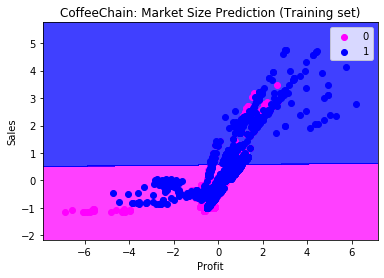

In [50]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('CoffeeChain: Market Size Prediction (Training set)')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


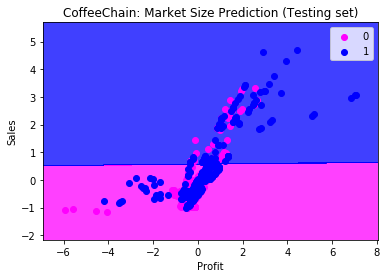

In [51]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('CoffeeChain: Market Size Prediction (Testing set)')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Brief description of Dataset     

In [1]:
import numpy as np 

import pandas as pd   # used for handling the dataset

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
dataset =pd.read_excel (r'Sample - CoffeeChain.xlsx')

In [3]:
dataset.columns

Index(['Profit', 'Margin', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget Margin', 'Budget Sales',
       'Budget COGS', 'Date', 'Market', 'State', 'Area Code', 'Market Size',
       'Product Type', 'Product', 'Type'],
      dtype='object')

In [4]:
dataset.describe()

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget Margin,Budget Sales,Budget COGS,Area Code
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,100.819209,175.649718,74.830508,582.278013
std,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,92.602725,148.891522,66.238145,221.140310
min,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,-210.000000,0.000000,0.000000,203.000000
25%,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,50.000000,80.000000,30.000000,417.000000
50%,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,70.000000,130.000000,50.000000,573.000000
75%,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,130.000000,210.000000,90.000000,772.000000
max,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,690.000000,1140.000000,450.000000,985.000000


# DATA PREPROCESSING

In [5]:
# Check out the missing values
#The concept of missing values is important to understand in order to successfully manage data. There is no missing or Nan values present in our dataset.
dataset.isnull().sum()

Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget Margin     0
Budget Sales      0
Budget COGS       0
Date              0
Market            0
State             0
Area Code         0
Market Size       0
Product Type      0
Product           0
Type              0
dtype: int64

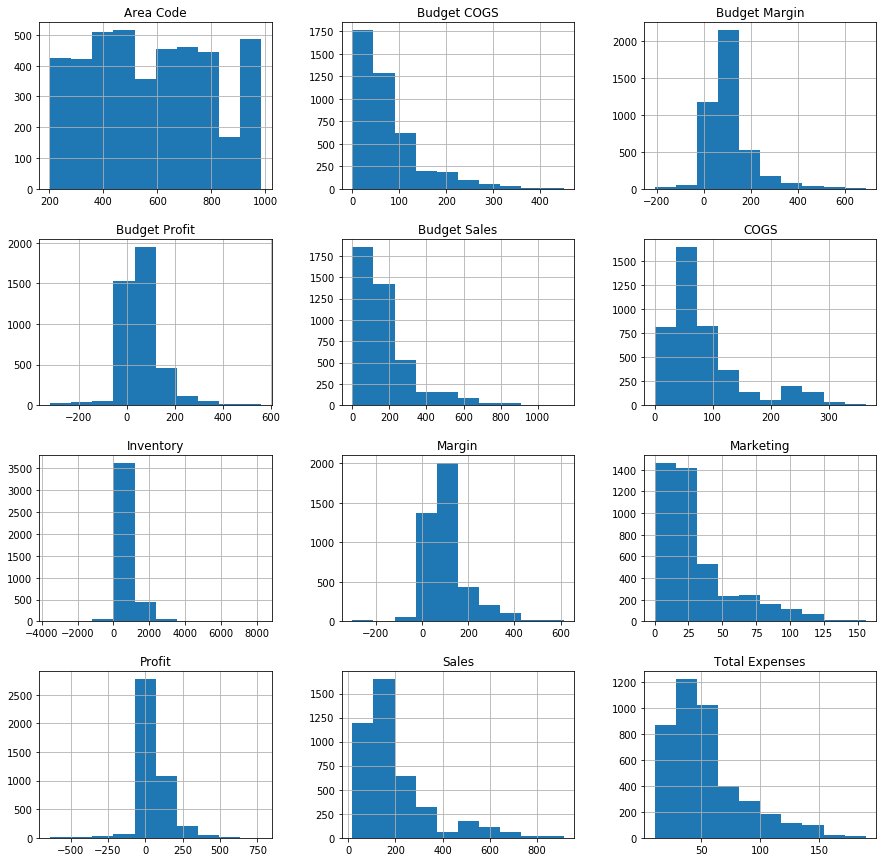

In [57]:
dataset.hist(figsize=(15,15));

# APPLYING SIMPLE LINEAR REGRESSION

In [58]:
X = pd.DataFrame(dataset.iloc[:,1])
Y = pd.DataFrame(dataset.iloc[:,8])

In [59]:
X

,Margin
0,130
1,107
2,139
3,56
4,80
...,...
4243,32
4244,80
4245,96
4246,104


In [60]:
Y

,Budget Margin
0,130
1,110
2,140
3,50
4,90
...,...
4243,30
4244,80
4245,100
4246,120


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print('coefficent(b1):' , regressor.coef_)

print('intercept(b0):' , regressor.intercept_)

coefficent(b1): [[0.93890135]]
intercept(b0): [2.52684936]


In [63]:
Y_pred = regressor.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error , r2_score
print("mean squared error: {}".format(mean_squared_error(Y_test,Y_pred)))
print("r2 score: {}".format(r2_score(Y_test,Y_pred)))
print("mean absolute error:",np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))
a=" {}".format(r2_score(Y_test,Y_pred))

mean squared error: 647.4651792194056
r2 score: 0.9281640713338362
mean absolute error: 3.803047481036061


This graph shows the blue line as the regression line and the red dots depict the data points.We can see that most of the points are close to the regression line which shows that the model has fit on the data correctly.


Text(0, 0.5, 'Budget Margin')

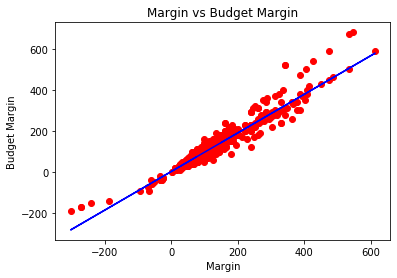

In [65]:
print("This graph shows the blue line as the regression line and the red dots depict the data points.We can see that most of the points are close to the regression line which shows that the model has fit on the data correctly.")
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("Margin vs Budget Margin")
plt.xlabel("Margin")
plt.ylabel("Budget Margin")


In [66]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=Y_train, cv=10)
accuracies

array([0.93558271, 0.94231429, 0.92625973, 0.94633034, 0.92112822,
       0.92813178, 0.91232618, 0.92519511, 0.93103143, 0.90479543])

In [67]:
accuracies.mean()

0.9273095223381734

In [68]:
accuracies.std()

0.012021127632748856

# APPLYING POLYINOMIAL REGRESSION

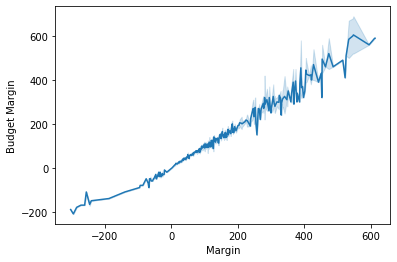

In [69]:
# Visualize the data
ax = sns.lineplot(x="Margin", y="Budget Margin", data=dataset)

In [6]:
X = dataset.iloc[:, 1]
y = dataset.iloc[:, 8]

In [7]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [8]:
X

array([[130],
       [107],
       [139],
       ...,
       [ 96],
       [104],
       [145]], dtype=int64)

In [9]:
y

array([[130],
       [110],
       [140],
       ...,
       [100],
       [120],
       [170]], dtype=int64)

In [10]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

FOR DEGREE= 2

In [75]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 2) #try 2,3 and 5
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

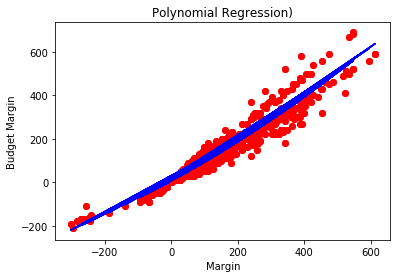

In [76]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression)')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.show()


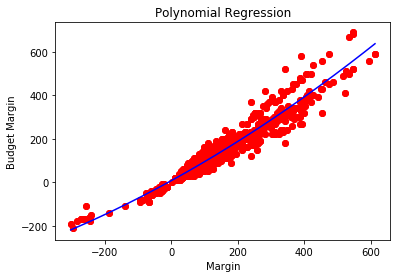

In [77]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.show()

FOR DEGREE=5

In [11]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 5) #try 2,3 and 4
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

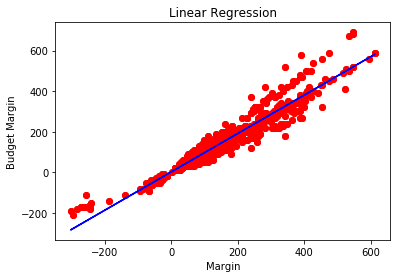

In [12]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.show()

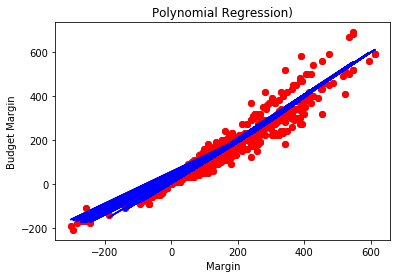

In [13]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression)')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.show()

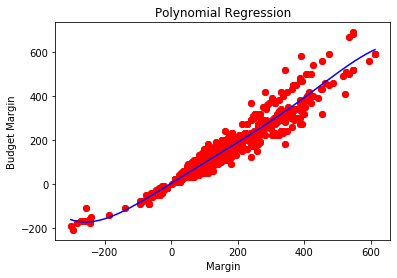

In [14]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.show()

# CLASSIFICATION TECHNIQUES

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
dataset1 =pd.read_excel (r'Sample - CoffeeChain.xlsx')

In [87]:
dataset= dataset1.replace(to_replace =["Small Market","Major Market"],value =["0","1"])

In [88]:
dataset

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget Margin,Budget Sales,Budget COGS,Date,Market,State,Area Code,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,130,220,90,2012-01-01,Central,Colorado,719,1,Coffee,Amaretto,Regular
1,68,107,190,83,39,27,623,80,110,190,80,2012-01-01,Central,Colorado,970,1,Coffee,Colombian,Regular
2,101,139,234,95,38,26,821,110,140,240,100,2012-01-01,Central,Colorado,970,1,Coffee,Decaf Irish Cream,Decaf
3,30,56,100,44,26,14,623,30,50,80,30,2012-01-01,Central,Colorado,303,1,Tea,Green Tea,Regular
4,54,80,134,54,26,15,456,70,90,150,60,2012-01-01,Central,Colorado,303,1,Espresso,Caffe Mocha,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,19,32,60,24,19,7,567,20,30,50,20,2013-12-01,West,Washington,206,0,Espresso,Caffe Latte,Regular
4244,34,80,155,65,57,24,403,30,80,140,60,2013-12-01,West,Washington,509,0,Espresso,Caffe Mocha,Regular
4245,76,96,188,80,45,24,1079,60,100,170,70,2013-12-01,West,Washington,360,0,Espresso,Decaf Espresso,Decaf
4246,86,104,188,72,46,23,461,80,120,200,80,2013-12-01,West,Washington,360,0,Coffee,Colombian,Regular


# 1. DECISION TREE CLASSIFICATION

In [89]:
X = dataset.iloc[:, [0,7]].values
y = dataset.iloc[:, 15].values

In [90]:
X

array([[ 94, 100],
       [ 68,  80],
       [101, 110],
       ...,
       [ 76,  60],
       [ 86,  80],
       [ 30,  50]], dtype=int64)

In [91]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
y_pred = classifier.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [97]:
cm

array([[561,  80],
       [218, 203]], dtype=int64)

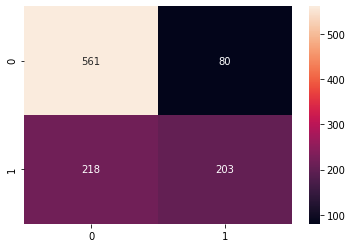

In [98]:
sns.heatmap(cm, annot=True, fmt="d")

In [99]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71939736346516


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       641
           1       0.72      0.48      0.58       421

    accuracy                           0.72      1062
   macro avg       0.72      0.68      0.68      1062
weighted avg       0.72      0.72      0.71      1062



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


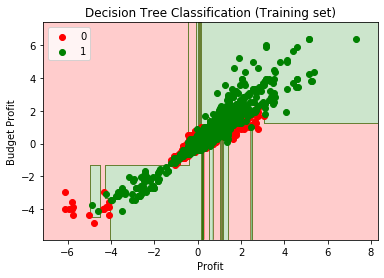

In [101]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Profit')
plt.ylabel('Budget Profit')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


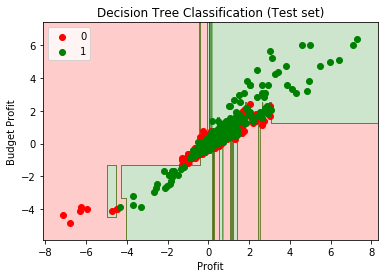

In [102]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Profit')
plt.ylabel('Budget Profit')
plt.legend()
plt.show()

In [103]:
X = dataset.iloc[:, [1,8]].values
y = dataset.iloc[:, 15].values

In [104]:
X

array([[130, 130],
       [107, 110],
       [139, 140],
       ...,
       [ 96, 100],
       [104, 120],
       [145, 170]], dtype=int64)

In [105]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
y_pred = classifier.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[573,  89],
       [111, 289]], dtype=int64)

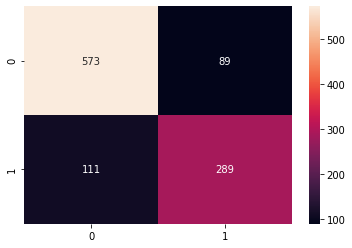

In [111]:
sns.heatmap(cm, annot=True, fmt="d")

In [112]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8116760828625236


In [115]:
#F1 Score with Precision and Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       662
           1       0.76      0.72      0.74       400

    accuracy                           0.81      1062
   macro avg       0.80      0.79      0.80      1062
weighted avg       0.81      0.81      0.81      1062



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


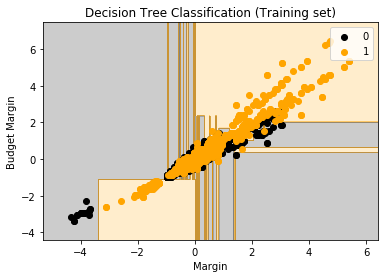

In [113]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('black', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'orange'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


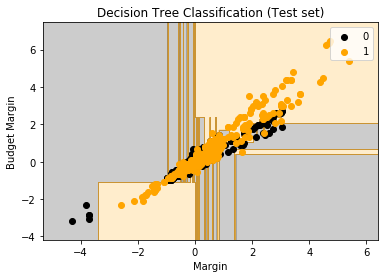

In [114]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('black', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'orange'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.legend()
plt.show()

In [116]:
X = dataset.iloc[:, [2,9]].values
y = dataset.iloc[:, 15].values

In [117]:
X

array([[219, 220],
       [190, 190],
       [234, 240],
       ...,
       [188, 170],
       [188, 200],
       [266, 290]], dtype=int64)

In [118]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[518, 123],
       [193, 228]], dtype=int64)

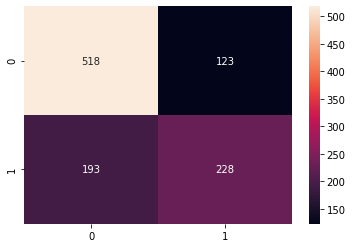

In [124]:
sns.heatmap(cm, annot=True, fmt="d")

In [125]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7024482109227872


In [126]:
#F1 Score with Precision and Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       641
           1       0.65      0.54      0.59       421

    accuracy                           0.70      1062
   macro avg       0.69      0.67      0.68      1062
weighted avg       0.70      0.70      0.70      1062



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


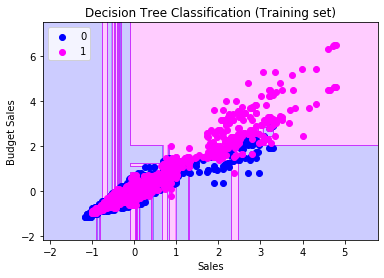

In [127]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('blue', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'magenta'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Sales')
plt.ylabel('Budget Sales')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


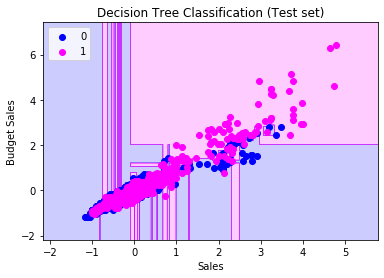

In [128]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('blue', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'magenta'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Sales')
plt.ylabel('Budget Sales')
plt.legend()
plt.show()

# 2. NAIVE BAYES CLASSIFICATION

In [129]:
X = dataset.iloc[:, [0,7]].values
y = dataset.iloc[:, 15].values

In [130]:
X

array([[ 94, 100],
       [ 68,  80],
       [101, 110],
       ...,
       [ 76,  60],
       [ 86,  80],
       [ 30,  50]], dtype=int64)

In [131]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [135]:
y_pred = classifier.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[574,  67],
       [292, 129]], dtype=int64)

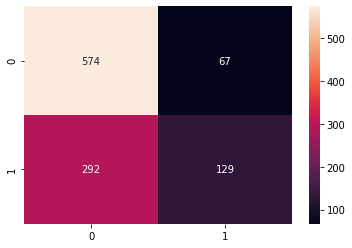

In [137]:
sns.heatmap(cm, annot=True, fmt="d")

In [138]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6619585687382298


In [139]:
#F1 Score with Precision and Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       641
           1       0.66      0.31      0.42       421

    accuracy                           0.66      1062
   macro avg       0.66      0.60      0.59      1062
weighted avg       0.66      0.66      0.63      1062



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


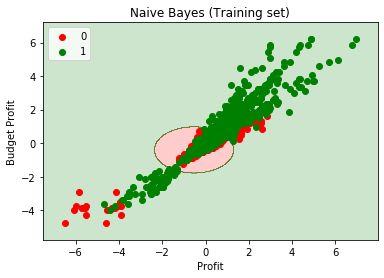

In [140]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Profit')
plt.ylabel('Budget Profit')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


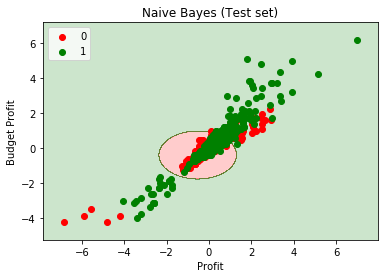

In [141]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Profit')
plt.ylabel('Budget Profit')
plt.legend()
plt.show()

In [142]:
X = dataset.iloc[:, [1,8]].values
y = dataset.iloc[:, 15].values

In [143]:
X

array([[130, 130],
       [107, 110],
       [139, 140],
       ...,
       [ 96, 100],
       [104, 120],
       [145, 170]], dtype=int64)

In [144]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [147]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [148]:
y_pred = classifier.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[568,  74],
       [308, 112]], dtype=int64)

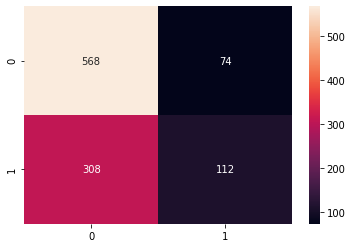

In [150]:
sns.heatmap(cm, annot=True, fmt="d")

In [151]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.64030131826742


In [152]:
#F1 Score with Precision and Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       642
           1       0.60      0.27      0.37       420

    accuracy                           0.64      1062
   macro avg       0.63      0.58      0.56      1062
weighted avg       0.63      0.64      0.60      1062



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


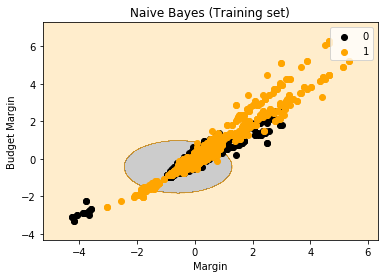

In [153]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('black', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'Orange'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


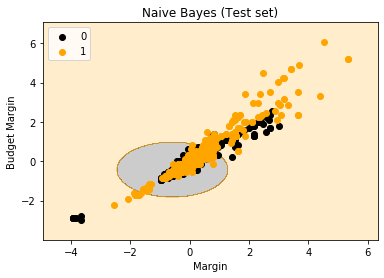

In [154]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('black', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'orange'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.legend()
plt.show()

In [155]:
X = dataset.iloc[:, [2,9]].values
y = dataset.iloc[:, 15].values

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [158]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [159]:
y_pred = classifier.predict(X_test)

In [160]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [161]:
cm

array([[555,  66],
       [312, 129]], dtype=int64)

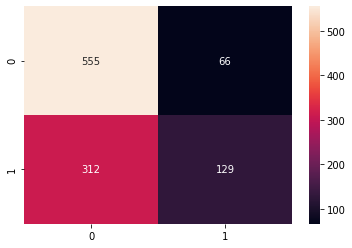

In [162]:
sns.heatmap(cm, annot=True, fmt="d")

In [163]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6440677966101694


In [164]:
#F1 Score with Precision and Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.89      0.75       621
           1       0.66      0.29      0.41       441

    accuracy                           0.64      1062
   macro avg       0.65      0.59      0.58      1062
weighted avg       0.65      0.64      0.60      1062



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


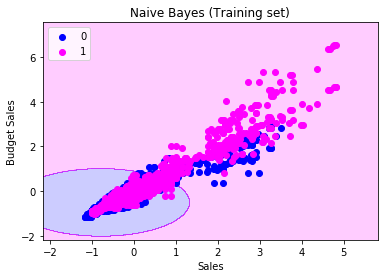

In [165]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('blue', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'magenta'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Sales')
plt.ylabel('Budget Sales')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


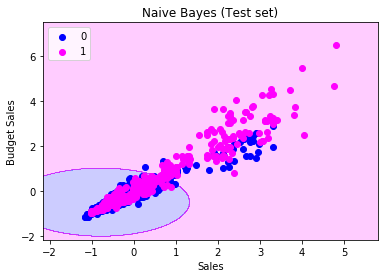

In [166]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('blue', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'magenta'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Sales')
plt.ylabel('Budget Sales')
plt.legend()
plt.show()

# 3. K NEAREST NEIGHBOUR CLASSIFICATION

In [167]:
X = dataset.iloc[:, [0,7]].values
y = dataset.iloc[:, 15].values

In [168]:
X

array([[ 94, 100],
       [ 68,  80],
       [101, 110],
       ...,
       [ 76,  60],
       [ 86,  80],
       [ 30,  50]], dtype=int64)

In [169]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [171]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [173]:
y_pred = classifier.predict(X_test)

In [174]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[518, 124],
       [187, 233]], dtype=int64)

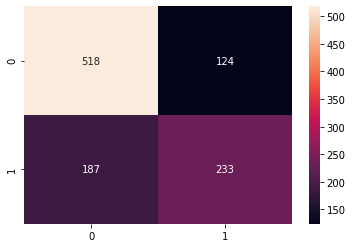

In [175]:
sns.heatmap(cm, annot=True, fmt="d")

In [176]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7071563088512242


In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       642
           1       0.65      0.55      0.60       420

    accuracy                           0.71      1062
   macro avg       0.69      0.68      0.68      1062
weighted avg       0.70      0.71      0.70      1062



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


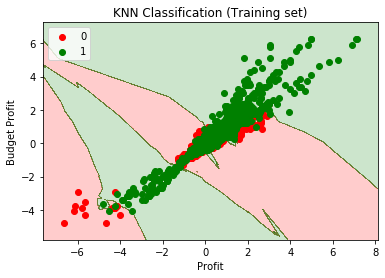

In [179]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Training set)')
plt.xlabel('Profit')
plt.ylabel('Budget Profit')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


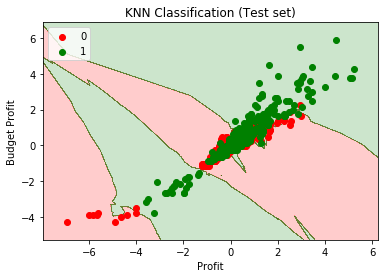

In [180]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Profit')
plt.ylabel('Budget Profit')
plt.legend()
plt.show()

In [181]:
X = dataset.iloc[:, [1,8]].values
y = dataset.iloc[:, 15].values

In [182]:
X

array([[130, 130],
       [107, 110],
       [139, 140],
       ...,
       [ 96, 100],
       [104, 120],
       [145, 170]], dtype=int64)

In [183]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [186]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [187]:
y_pred = classifier.predict(X_test)

In [188]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[540, 117],
       [152, 253]], dtype=int64)

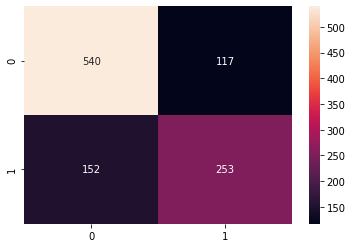

In [189]:
sns.heatmap(cm, annot=True, fmt="d")

In [190]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7467043314500942


In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       657
           1       0.68      0.62      0.65       405

    accuracy                           0.75      1062
   macro avg       0.73      0.72      0.73      1062
weighted avg       0.74      0.75      0.74      1062



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


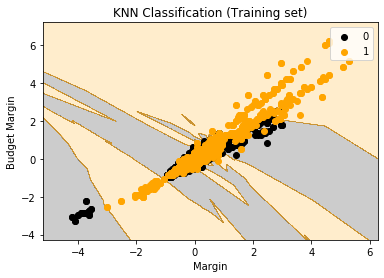

In [192]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('black', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'orange'))(i), label = j)
plt.title('KNN Classification (Training set)')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


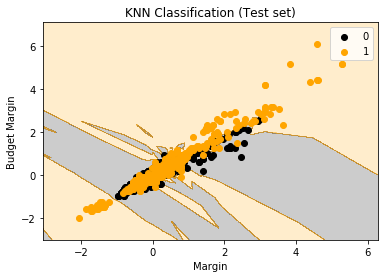

In [194]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('black', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'orange'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Margin')
plt.ylabel('Budget Margin')
plt.legend()
plt.show()

In [195]:
X = dataset.iloc[:, [2,9]].values
y = dataset.iloc[:, 15].values

In [196]:
X

array([[219, 220],
       [190, 190],
       [234, 240],
       ...,
       [188, 170],
       [188, 200],
       [266, 290]], dtype=int64)

In [197]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [200]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [201]:
y_pred = classifier.predict(X_test)

In [202]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[480, 132],
       [175, 275]], dtype=int64)

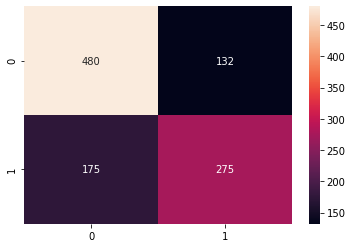

In [203]:
sns.heatmap(cm, annot=True, fmt="d")

In [204]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7109227871939736


In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       612
           1       0.68      0.61      0.64       450

    accuracy                           0.71      1062
   macro avg       0.70      0.70      0.70      1062
weighted avg       0.71      0.71      0.71      1062



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


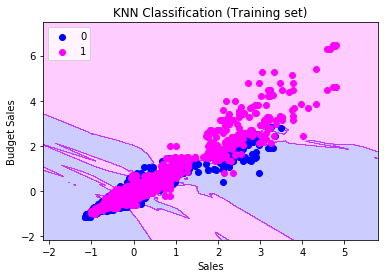

In [206]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('blue', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'magenta'))(i), label = j)
plt.title('KNN Classification (Training set)')
plt.xlabel('Sales')
plt.ylabel('Budget Sales')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


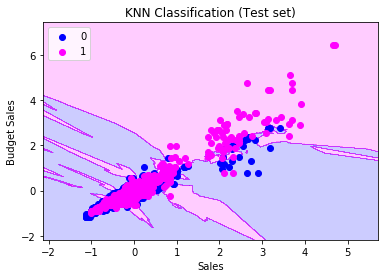

In [336]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('blue', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'magenta'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Sales')
plt.ylabel('Budget Sales')
plt.legend()
plt.show()

THANKYOU!